
# Error Analysis: Truncation and Round-Off Errors, Stability of Numerical Methods

## Overview
Error analysis is essential in numerical computation, helping us understand how numerical approximations deviate from exact solutions. Key aspects include:

- **Truncation Errors**: Errors introduced by approximating an infinite process by a finite one.
- **Round-Off Errors**: Errors due to the limitations of floating-point representation in computers.
- **Stability of Numerical Methods**: Stability ensures that errors do not grow uncontrollably through the calculations.


## 1. Truncation Error

Truncation errors occur when we approximate an infinite series or process with a finite number of terms. For example, using the Taylor series expansion to approximate functions introduces truncation errors.

Let's use the Taylor series of \( \sin(x) \) to approximate the function and analyze the truncation error.


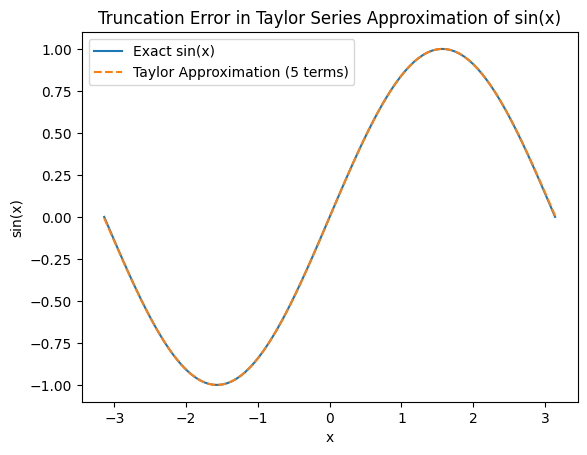

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the function and its Taylor series approximation
def sin_taylor(x, n_terms=5):
    approximation = 0
    for n in range(n_terms):
        term = ((-1)**n * x**(2 * n + 1)) / math.factorial(2 * n + 1)
        approximation += term
    return approximation

# Define x values for plotting
x_values = np.linspace(-np.pi, np.pi, 100)
y_exact = np.sin(x_values)
y_approx = sin_taylor(x_values, n_terms=5)

# Plot the exact function and the approximation
plt.plot(x_values, y_exact, label="Exact sin(x)")
plt.plot(x_values, y_approx, label="Taylor Approximation (5 terms)", linestyle='--')
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Truncation Error in Taylor Series Approximation of sin(x)")
plt.legend()
plt.show()



## 2. Round-Off Error

Round-off errors occur due to the limited precision in representing numbers on computers. For example, small numbers may be rounded when added to much larger numbers, leading to loss of precision.

Let's demonstrate round-off error by summing small increments and observing the accumulated error.


In [3]:

# Summing small increments to demonstrate round-off error
n = 1000000
increment = 1e-10
sum_exact = n * increment  # Expected sum

# Summing iteratively
sum_approx = 0.0
for _ in range(n):
    sum_approx += increment

print(f"Exact Sum: {sum_exact}")
print(f"Approximated Sum with Round-Off Error: {sum_approx}")
print(f"Round-Off Error: {abs(sum_exact - sum_approx)}")


Exact Sum: 0.0001
Approximated Sum with Round-Off Error: 9.999999999756678e-05
Round-Off Error: 2.4332207256005933e-15



## 3. Stability of Numerical Methods

Stability ensures that errors do not grow uncontrollably in numerical calculations. Stable methods produce results that are resilient to small errors, while unstable methods can amplify them.

Let's explore stability by solving the differential equation \( dy/dx = -10y \) with different step sizes using Euler's method.


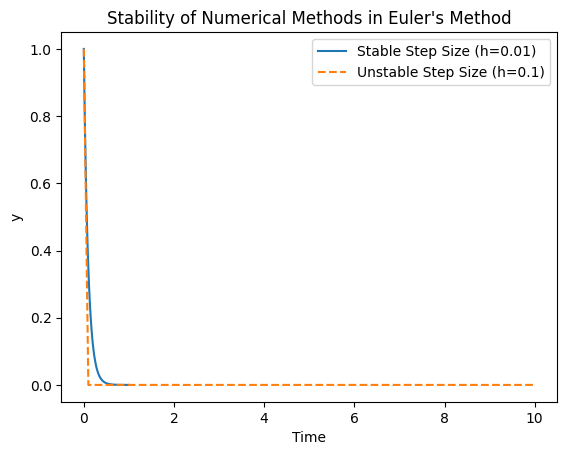

In [4]:

# Solving dy/dx = -10y using Euler's method with different step sizes
def euler_method(y0, h, num_steps):
    y_values = [y0]
    for _ in range(num_steps):
        y_new = y_values[-1] - 10 * y_values[-1] * h
        y_values.append(y_new)
    return y_values

# Parameters
y0 = 1  # Initial condition
h_small = 0.01  # Stable step size
h_large = 0.1   # Larger, potentially unstable step size
num_steps = 100

# Solve using Euler's method
y_small_h = euler_method(y0, h_small, num_steps)
y_large_h = euler_method(y0, h_large, num_steps)

# Time values for plotting
time_small_h = np.linspace(0, num_steps * h_small, num_steps + 1)
time_large_h = np.linspace(0, num_steps * h_large, num_steps + 1)

# Plotting results
plt.plot(time_small_h, y_small_h, label=f"Stable Step Size (h={h_small})")
plt.plot(time_large_h, y_large_h, label=f"Unstable Step Size (h={h_large})", linestyle='--')
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Stability of Numerical Methods in Euler's Method")
plt.legend()
plt.show()



## Summary

In this notebook, we explored:

- **Truncation Errors**: Errors introduced by approximating infinite processes with finite terms, demonstrated through Taylor series.
- **Round-Off Errors**: Errors due to limitations in floating-point precision, demonstrated by summing small increments.
- **Stability of Numerical Methods**: The importance of choosing appropriate step sizes in numerical methods, illustrated using Euler's method.
